<a href="https://colab.research.google.com/github/munyanza/house_prediction_model/blob/main/houseprediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.DataFrame({
    'house_age':[2,5,10,1,20,15,8,12,25,30,4,7,18,22,3,9,14,6,11,16],
    'size_sqrt':[850,1200,1500,600,2000,1700,1400,1600,2200,2500,900,1300,1900,2100,950,1450,1750,1250,1550,1850],
    'num_rooms':[3,4,5,2,6,5,4,5,7,8,3,4,6,7,3,4,5,4,5,6],
    'location_score':[8,7,9,6,5,6,7,8,5,4,7,8,6,5,9,7,6,8,7,6],
    'near_school':['yes','no','yes','no','yes','yes','no','yes','no','no','yes','no','yes','no','yes','yes','no','yes','no','yes'],
    'house_price($)':[150000,200000,250000,120000,300000,280000,220000,260000,350000,400000,
                     160000, 210000, 290000, 330000, 170000, 230000, 270000, 190000, 240000, 310000 ]
})
df.head()

,house_age,size_sqrt,num_rooms,location_score,near_school,house_price($)
0,2,850,3,8,yes,150000
1,5,1200,4,7,no,200000
2,10,1500,5,9,yes,250000
3,1,600,2,6,no,120000
4,20,2000,6,5,yes,300000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   house_age       20 non-null     int64 
 1   size_sqrt       20 non-null     int64 
 2   num_rooms       20 non-null     int64 
 3   location_score  20 non-null     int64 
 4   near_school     20 non-null     object
 5   house_price($)  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
df.describe()

,house_age,size_sqrt,num_rooms,location_score,house_price($)
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,11.900000,1527.500000,4.800000,6.700000,246500.000000
std,8.038722,491.098393,1.542384,1.380313,71911.861257
min,1.000000,600.000000,2.000000,4.000000,120000.000000
25%,5.750000,1237.500000,4.000000,6.000000,197500.000000
50%,10.500000,1525.000000,5.000000,7.000000,245000.000000
75%,16.500000,1862.500000,6.000000,8.000000,292500.000000
max,30.000000,2500.000000,8.000000,9.000000,400000.000000


Text(0.5, 1.0, 'House Size vs Price')

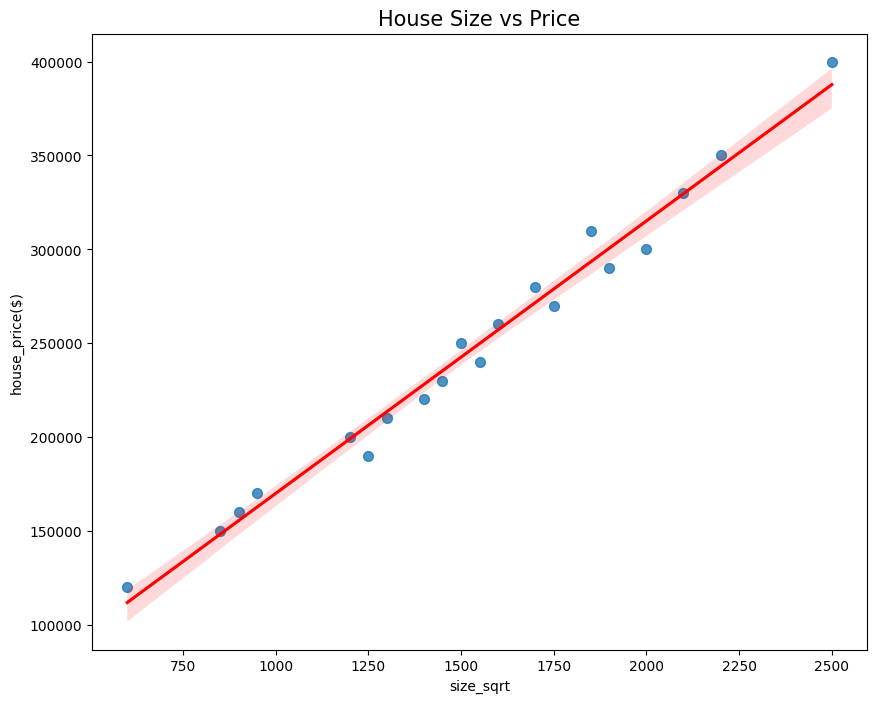

In [5]:
plt.figure(figsize=(10,8))
sns.regplot(x='size_sqrt',y='house_price($)',data=df,scatter_kws={'s':50},line_kws={'color':'red'})
plt.title('House Size vs Price',fontsize=15)

Text(0, 0.5, 'Count of Houses')

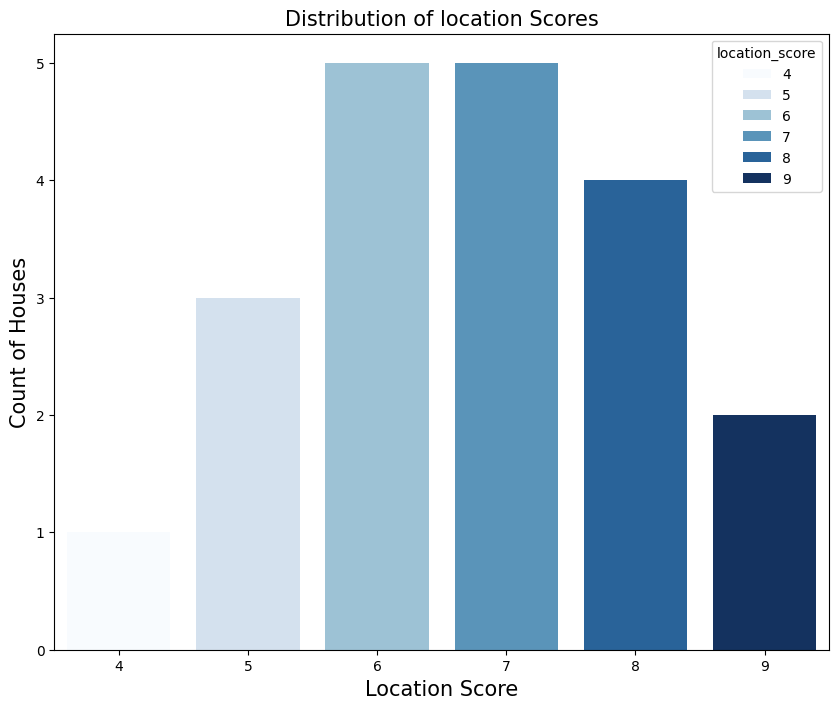

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(x='location_score',data=df,palette='Blues',hue='location_score')
plt.title('Distribution of location Scores',fontsize=15)
plt.xlabel('Location Score',fontsize=15)
plt.ylabel('Count of Houses',fontsize=15)

/tmp/ipython-input-2068470206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='near_school',y='house_price($)',data=df,estimator=np.mean,palette='Set2')


Text(0, 0.5, 'Average Price ($)')

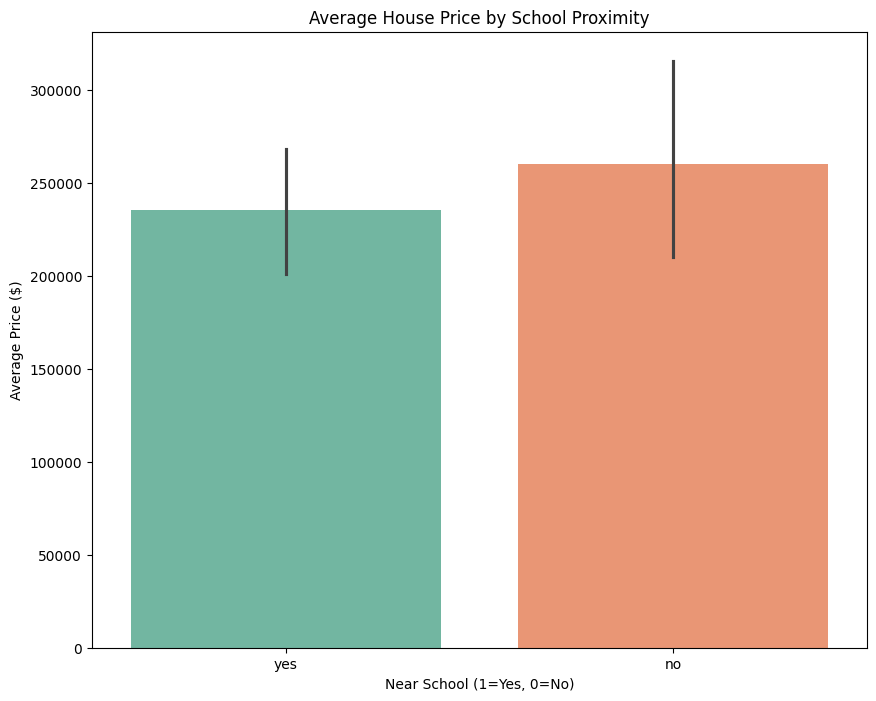

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(x='near_school',y='house_price($)',data=df,estimator=np.mean,palette='Set2')
plt.title("Average House Price by School Proximity")
plt.xlabel("Near School (1=Yes, 0=No)")
plt.ylabel("Average Price ($)")

In [8]:
y_n ={
    'yes':1,
    'no':0
}
df['near_school']=df['near_school'].replace(y_n)

/tmp/ipython-input-145145449.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['near_school']=df['near_school'].replace(y_n)


In [9]:
df

,house_age,size_sqrt,num_rooms,location_score,near_school,house_price($)
0,2,850,3,8,1,150000
1,5,1200,4,7,0,200000
2,10,1500,5,9,1,250000
3,1,600,2,6,0,120000
4,20,2000,6,5,1,300000
5,15,1700,5,6,1,280000
6,8,1400,4,7,0,220000
7,12,1600,5,8,1,260000
8,25,2200,7,5,0,350000
9,30,2500,8,4,0,400000


In [10]:
reg = linear_model.LinearRegression()
reg.fit(df[['house_age','size_sqrt','num_rooms','location_score','near_school']],df['house_price($)'])

LinearRegression()

In [11]:
#PREDICTIONS
#House A
# Age: 5 years
#Size: 1400 sqft
#Rooms: 4
#Location score: 7
#Near school: 1 (Yes)
p1 = reg.predict([[5,1400,4,7,1]])

print('The prediction of the house A is: ${:,.0f}'.format(p1[0]))


The prediction of the house A is: $211,550


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
#House B
# Age: 12 years
# Size: 1800 sqft
# Rooms: 6
# Location score: 6
# Near school: 0 (No)

p2 = reg.predict([[12,1800,6,6,0]])
print('The prediction price of House B is: ${:,.0f}'.format(p2[0]))


The prediction price of House B is: $276,265


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
